# Exploratory data analysis

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

from function_test import weekday, nameCategory, oneDay

In [28]:
#from vizual_data import vizualCount
df = pd.read_csv("FR_youtube_trending_data.csv")

df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


### Missing value

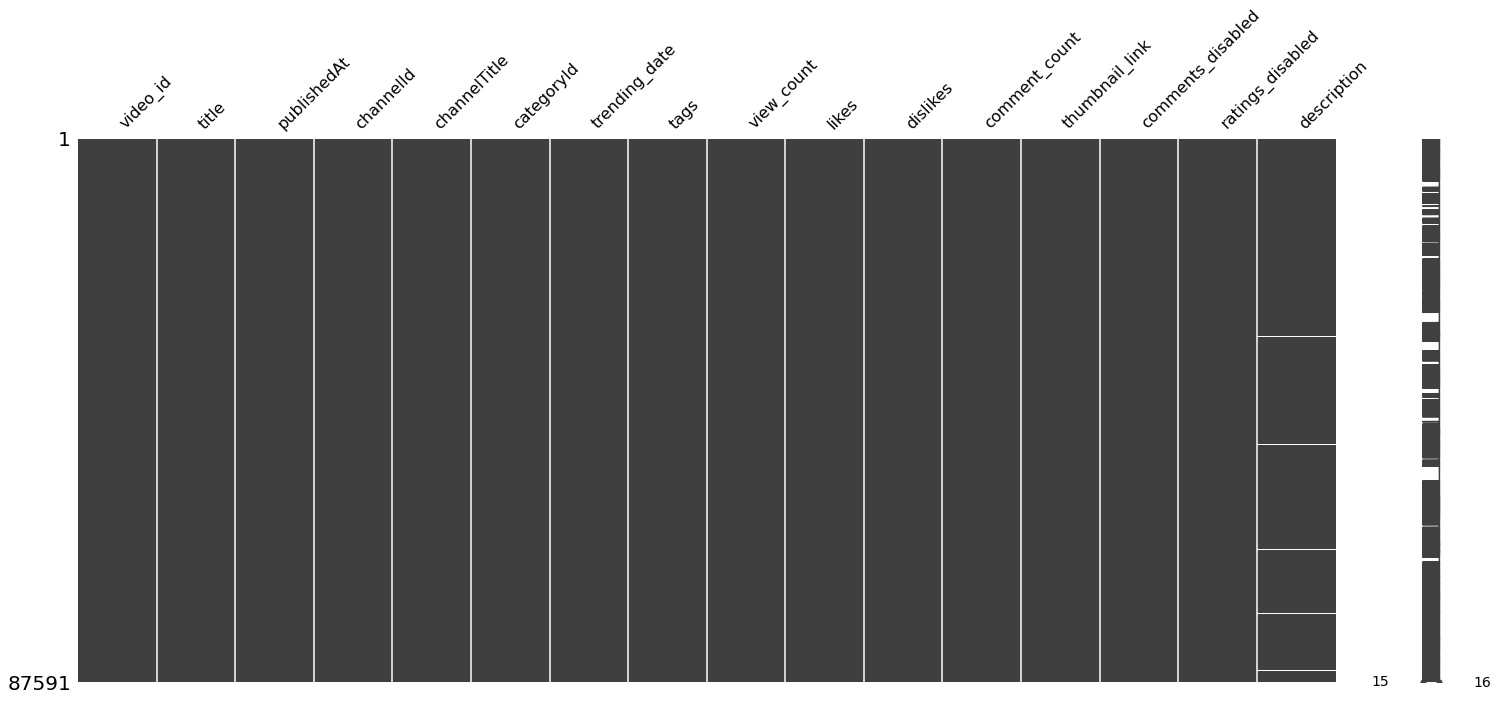

In [29]:
msno.matrix(df)

### The available categories

In [30]:
df['categoryId'] = df['categoryId'].apply(lambda x: nameCategory(int(x)))

infoByCategory = df.groupby('categoryId')['view_count', 'likes', 'dislikes', 'comment_count'].sum()
infoByCategory

<ipython-input-30-5018b3179010>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  infoByCategory = df.groupby('categoryId')['view_count', 'likes', 'dislikes', 'comment_count'].sum()


,view_count,likes,dislikes,comment_count
categoryId,,,,
Autos & Vehicles,579833471,46601856,503254,2799666
Comedy,5609396609,522539482,6383276,18723335
Education,998028265,41152758,600166,2434296
Entertainment,15612588702,1336233991,17679764,74015845
Film & Animation,964773135,46553855,758389,3375822
Gaming,6522799695,365017331,7453412,25990922
Howto & Style,812984718,67602604,1072235,2704021
Music,52126078477,4015497642,69535054,504374870
News & Politics,875739790,25094215,1901913,3833439


### How many days on average stays a video on in the trending list ?

In [31]:
df_TrendingTime = df.groupby(['video_id', 'publishedAt', 'categoryId'])['trending_date'].value_counts()
df_TrendingTime = pd.DataFrame(df_TrendingTime)
df_TrendingTime.columns = ['Nbr']
df_TrendingTime = df_TrendingTime.reset_index()
del df_TrendingTime['Nbr']

In [32]:
df_TrendingTime

,video_id,publishedAt,categoryId,trending_date
0,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-12T00:00:00Z
1,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-13T00:00:00Z
2,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-14T00:00:00Z
3,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-15T00:00:00Z
4,--14w5SOEUs,2021-06-10T16:00:00Z,Music,2021-06-16T00:00:00Z
...,...,...,...,...
83861,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-04T00:00:00Z
83862,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-05T00:00:00Z
83863,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-06T00:00:00Z
83864,zzk09ESX7e0,2021-06-02T09:00:10Z,Music,2021-06-07T00:00:00Z


In [33]:
df_TrendingDay = df_TrendingTime.groupby('video_id').count()
df_TrendingDay.trending_date.describe() 
# Le temps passer dans les tendances se compte en jour

count    18103.000000
mean         4.632713
std          1.437324
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: trending_date, dtype: float64

### How long does it take for a video to be in the trending list ?

In [34]:
df_TrendingTime.drop_duplicates(subset ="video_id", keep = 'first', inplace=True)

In [35]:
df_TrendingTime[ df_TrendingTime['publishedAt'] == df_TrendingTime['publishedAt']]
df_TrendingTime[['publishedAt','trending_date']] = df_TrendingTime[['publishedAt','trending_date']].apply(pd.to_datetime)

In [36]:
from datetime import datetime

def days_between(d1, d2):
    return abs((d2 - d1).days)

def hours_between(d1, d2):
    a = abs((d2 - d1).days)*86400
    return int((a+abs((d2 - d1).seconds))/3600)

In [37]:
df_TrendingTime['days_between'] = list(map(lambda x, y : days_between(x, y), df_TrendingTime['publishedAt'],df_TrendingTime['trending_date']))
df_TrendingTime['hours_between'] = list(map(lambda x, y : hours_between(x, y), df_TrendingTime['publishedAt'], df_TrendingTime['trending_date']))
df_TrendingTime

,video_id,publishedAt,categoryId,trending_date,days_between,hours_between
0,--14w5SOEUs,2021-06-10 16:00:00+00:00,Music,2021-06-12 00:00:00+00:00,1,32
7,--2Us2lFR8Y,2021-02-11 17:02:05+00:00,Entertainment,2021-02-12 00:00:00+00:00,0,6
13,--38nmkJJmE,2021-03-28 11:14:36+00:00,Gaming,2021-03-29 00:00:00+00:00,0,12
19,--4D57S8fLo,2020-09-06 15:00:32+00:00,Entertainment,2020-09-07 00:00:00+00:00,0,8
25,--PNXe6E0_Y,2021-03-05 16:57:06+00:00,Music,2021-03-06 00:00:00+00:00,0,7
...,...,...,...,...,...,...
83839,zzC9w5TbDvk,2020-09-20 16:16:06+00:00,Howto & Style,2020-09-21 00:00:00+00:00,0,7
83845,zzRM7bCvdaQ,2020-11-12 16:00:26+00:00,Comedy,2020-11-14 00:00:00+00:00,1,31
83850,zzX_eqBD-qE,2021-01-27 16:44:20+00:00,Travel & Events,2021-01-28 00:00:00+00:00,0,7
83854,zzd4ydafGR0,2021-02-12 05:03:49+00:00,Music,2021-02-12 00:00:00+00:00,1,42


In [38]:
df_TrendingTime.describe()

,days_between,hours_between
count,18103.000000,18103.000000
mean,0.472684,20.331492
std,0.968064,23.817686
min,0.000000,0.000000
25%,0.000000,7.000000
50%,0.000000,12.000000
75%,1.000000,31.000000
max,28.000000,688.000000


**Weekly Evolution for the number of view by category**

In [39]:
df1 = pd.DataFrame(df)
df1['publishedAt'] = df1['publishedAt'].apply(lambda x: weekday(x))
df1.drop_duplicates(subset ="video_id", keep = 'last', inplace=True)
df1

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
71,bRD_gPCjcCc,Résumé: Man United (Q) 1-0 Copenhague (ap. pro...,2,UCR5V8BTvlkyYtw6T_9swNEw,RMC Sport,Sports,2020-08-12T00:00:00Z,ligue europa|europa league,71736,0,0,238,https://i.ytimg.com/vi/bRD_gPCjcCc/default.jpg,False,True,Man United 1-0 CopenhagueLigue Europa quart de...
87,R_SrITSunCs,Résumé: Inter (Q) 2-1 Leverkusen - Ligue Europ...,2,UCR5V8BTvlkyYtw6T_9swNEw,RMC Sport,Sports,2020-08-12T00:00:00Z,[None],102096,0,0,216,https://i.ytimg.com/vi/R_SrITSunCs/default.jpg,False,True,Inter (Q) 2-1 LeverkusenLigue Europa quart de ...
90,rwPND7MUYi8,Ligue des champions : Le film de l’exploit lyo...,0,UCR5V8BTvlkyYtw6T_9swNEw,RMC Sport,Entertainment,2020-08-12T00:00:00Z,foot|football|LDC|ligue des champions football...,457959,11537,297,1484,https://i.ytimg.com/vi/rwPND7MUYi8/default.jpg,False,False,"Malgré un doublé de Cristiano Ronaldo, l'OL n'..."
91,B2NQvgPPRnU,les plus beaux jours de notre life,0,UCDkl5M0WVaddTWE4rr2cSeA,Léna Situations,People & Blogs,2020-08-12T00:00:00Z,[None],1194004,106908,782,3351,https://i.ytimg.com/vi/B2NQvgPPRnU/default.jpg,False,False,Après de nombreux problèmes de connexion inter...
106,liyoVKZuw18,Dreamcatcher(드림캐쳐) 5th Mini Album [Dystopia : ...,2,UCijULR2sXLutCRBtW3_WEfA,Dreamcatcher official,Music,2020-08-12T00:00:00Z,Dreamcatcher|드림캐쳐|드캐 컴백|드캐 티저|드캐 뮤비|드캐|Dreamca...,181856,41361,63,4385,https://i.ytimg.com/vi/liyoVKZuw18/default.jpg,False,False,Dreamcatcher(드림캐쳐) 5th Mini Album [Dystopia : ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87586,O2W2gUXAt78,My hidden talent #shorts,6,UCiJUp_NBW2D_UMQIvq2nlPg,Zach King Shorts,Comedy,2021-10-17T00:00:00Z,shorts|#shorts|zach king|magic|tiktok|dance|fe...,62885609,2069926,36667,3949,https://i.ytimg.com/vi/O2W2gUXAt78/default.jpg,False,False,Not many people know about my hidden talent of...
87587,6Ge4X4ZnYyw,PNL VOULAIT ME RAMENER PIRE QU'UN SINGE (Ses d...,1,UCJCYhGLtq-dYmUDTWjiBrqg,Lacrem TV,Entertainment,2021-10-17T00:00:00Z,[None],136907,6928,42,153,https://i.ytimg.com/vi/6Ge4X4ZnYyw/default.jpg,False,False,Dans notre format Face à toi MEME Fred Musa re...
87588,QkttKYz6Q0o,LA PIRE GROSSESSE DE MA VIE ! Chitchat Makeup,0,UC8JTNu9mq4EnYnxTnuvr6Xg,YanissaXoxo,People & Blogs,2021-10-17T00:00:00Z,[None],321470,26916,183,453,https://i.ytimg.com/vi/QkttKYz6Q0o/default.jpg,False,False,🤩CLIQUE POUR CHANGER TA VIE BÉBÉ 🔥✨✨Produits d...
87589,7jRyqm8Sues,Le SEUM MONUMENTAL d'Aymeric Laporte après Esp...,1,UCrzDtXyuSBch2u_31JJj-Dw,Foot Mercato,Sports,2021-10-17T00:00:00Z,foot|football|foot mercato|info mercato|info t...,235507,7855,309,955,https://i.ytimg.com/vi/7jRyqm8Sues/default.jpg,False,False,Dans cette finale de Ligue des Nations très pa...


In [40]:
def viewPerdayData(df1):
    viewPerday = df1.groupby('publishedAt')['view_count'].sum()
    for i in range(len(viewPerday)):
        week=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        viewPerday = list(viewPerday)
        print(week[i]+" : "+str(viewPerday[i]))

viewPerdayData(df1)

Sunday : 2358595016
Monday : 3336281709
Tuesday : 3234944329
Wednesday : 2458482054
Thursday : 2983115654
Friday : 6723118770
Saturday : 1636779147


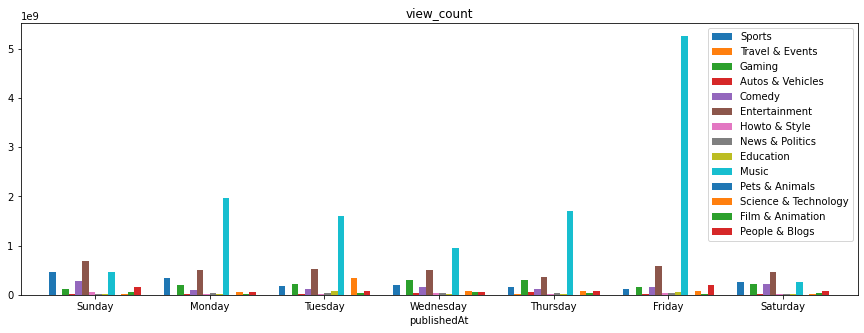

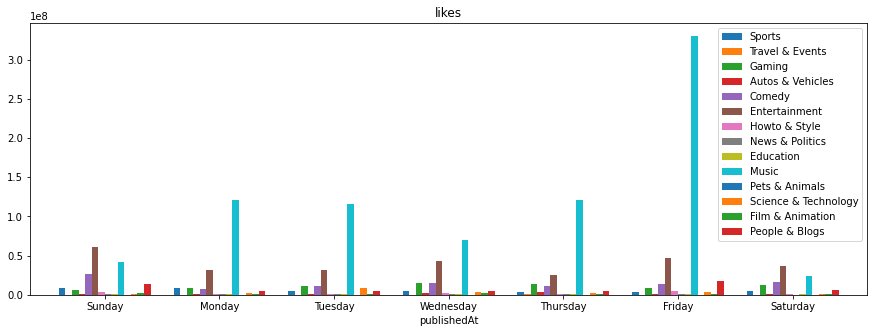

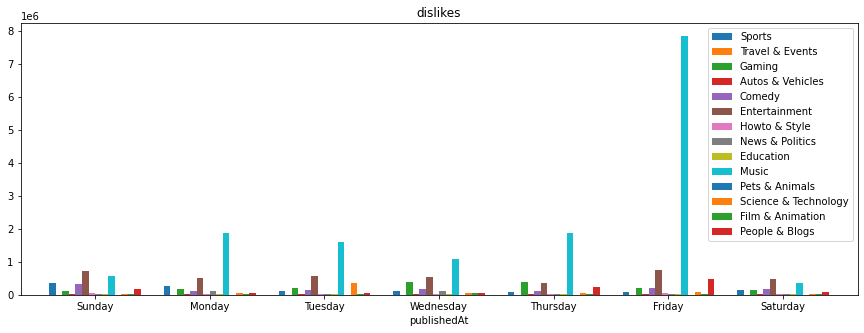

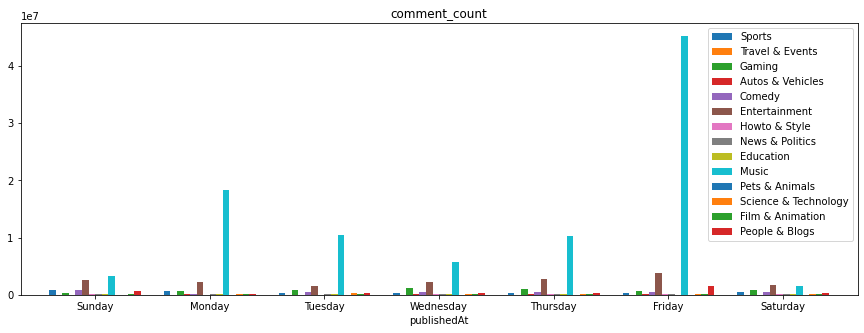

In [41]:

def dataPerDayPlot(df, typec):
    for i in range(len(typec)):
        data = df.groupby(['categoryId', 'publishedAt'])[typec[i]].sum()
        
        week=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        category = list(set(data.index.get_level_values(0)))
        dfPerday = pd.DataFrame()

        plt.rcParams['figure.figsize'] = [15, 5]

        for j in category:
            dfPerday.loc[:, j] = data[j][:]
        dfPerday.plot.bar(width=0.8, rot=0)
        plt.xticks([0,1,2,3,4,5,6], week)
        plt.legend(title_fontsize='x-small')
        plt.title(typec[i])

    plt.show()

typec = ['view_count', 'likes', 'dislikes','comment_count']
dataPerDayPlot(df1, typec)

In [ ]:
print("Hello")